# Problem set  2

# Mateo Velásquez-Giraldo

In [1]:

%matplotlib notebook

import numpy as np
import math
import matplotlib.pyplot as plt
from collections import namedtuple

## 1. Population Growth and Dynamic Inefficiency in the OLG Model.

Let lowercase letters denote per-capita values. We adopt the same notation as in the handout OLGModel.

### a) 

Households decide their consumption taking wages and interest rate as exogenous. Therefore, their maximization problem generates the Euler equation

\begin{equation}
u'(c_{1,t}) = \beta R_{t+1} u'(c_{2,t+1}).
\end{equation}

Considering that $u(\cdot) = \ln (\cdot)$ and thus $u'(\cdot) = 1/\cdot$; and that old-age consumption is equal to young-age savings, $c_{2,t+1} = R_{t+1}\times(W_{1,t} - c_{1,t})$, the Euler equation becomes

\begin{align}
&\frac{1}{c_{1,t}} = \beta R_{t+1} \frac{1}{R_{t+1}\times(W_{1,t} - c_{1,t})}\\
&\Leftrightarrow c_1 = \frac{W_{1,t}}{1+\beta}.
\end{align}

To find the wage, we now define percapita production $$F(K_t,L_t)/L_t = K_t^\varepsilon L_t ^{1-\varepsilon} / L_t = (K_t/L_t)^\varepsilon = k_t^\varepsilon$$ and derive the interest rate and wage under perfect competition conditions:

\begin{equation}
r_t = \frac{dF(K_t,L_t)}{d K_t} = \varepsilon (K_t/L_t)^{\varepsilon-1} = \varepsilon k_t^{\varepsilon-1}
\end{equation}

\begin{equation}
W_t = \frac{dF(K_t,L_t)}{dL_t} =(1-\varepsilon)K_t^\varepsilon L_t^{-\varepsilon} = (1-\varepsilon)k_t^\varepsilon.
\end{equation}

We know that $K_{t+1} = a_{1,t}L_t$, therefore, $$k_{t+1} = \frac{a_{1,t}L_{t}}{L_{t+1}} = \frac{a_{1,t}L_{t}}{\Xi_{t+1} L_{t}} = \frac{a_{1,t}}{\Xi_{t+1}}.$$

We can now replace consumption and wages into savings $$a_{1,t} = W_{1,t} -c_{1,t} = W_{1,t}(1-\frac{1}{1+\beta}) = (1-\varepsilon)k_t^\varepsilon \frac{\beta}{1+\beta}$$

and obtain the capital per capita dynamic equation $$k_{t+1} =  k_t^\varepsilon\frac{\beta (1-\varepsilon)}{\Xi_{t+1}(1+\beta)}$$

### b)

In the steady state, capital is equal to $\bar{k}$ at all periods and population growth is constant. Therefore, the capital per capita dynamic equation becomes

\begin{align}
    \bar{k}=  \bar{k}^\varepsilon\frac{\beta (1-\varepsilon)}{\Xi(1+\beta)} \leftrightarrow \bar{k}=  \left(\frac{\beta (1-\varepsilon)}{\Xi(1+\beta)}\right)^{\frac{1}{1-\varepsilon}},
\end{align}

giving us the steady state level of capital.

### c) 

The expression for steady state capital per capita shows that it depends negatively on the population growth rate. This implies that the new steady state capital per capita level will be lower than the previous one.

The reason for this is that in the model, total capital in one period is equal to the total savings of the young in the previous period, who save for their own consumption. Therefore, the ammount of saving people do will not be directly affected by the information that there will be a greater population in the next period. The only channel through which this information may affect saving decisions is the interest rate: if a future larger labor force makes capital better paid, people may be willing to save more. However, our assumption of a logarithmic utility and no non-capital income at old ages makes savings not depend on the interest rate, anulating this effect.

Therefore, the first generation to learn about the higher $\Xi$ will not change its savings. The next generation will be biger, and as total capital stock is left equal, capital per capita will drop. This will drive down the productivity of labor and thus wages, making this generation save less, further diluting capital per capita. This chain of effects will continue until the economy converges to a lower level of steady state capital. 

### d)

<IPython.core.display.Javascript object>


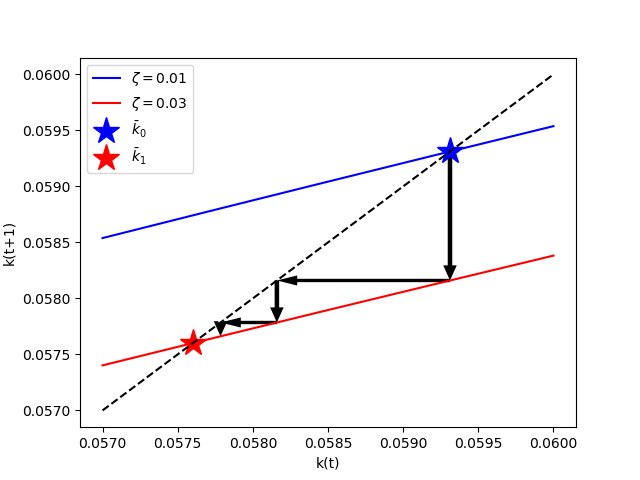

In [11]:
num_arrows = 3
limits = [0.057,0.06]

# This function receives an OLG model's parameters and returns a pair
# of vectors corresponding to k(t) and k(t+1), and the steady state capital.
def olg_capital(beta = 0.96**30, epsilon = 0.33, zeta = 0.01, n_grid = 1000, kMin = 0, kMax = 0.1):
    
    # Capital per capita equation
    k_next = np.vectorize(lambda k: k**epsilon*((1-epsilon)*beta/((1+zeta)*(1+beta))))
    
    # Steady state capital
    k_bar = (beta*(1-epsilon)/((1+zeta)*(1+beta)))**(1/(1-epsilon))
    
    kt = np.linspace(kMin, kMax, n_grid)
    kt1 = k_next(kt)
    
    result = namedtuple('sim',['kt','kt1','kss'])
    return(result(kt = kt, kt1 = kt1, kss = k_bar))

# This function computes the capital evolution for a given number of periods and 
# a given initial state
def adjustment(k0,numiter = 3, beta = 0.96**30, epsilon = 0.33, zeta = 0.01):
    # Capital per capita equation
    k_next = lambda k: k**epsilon*((1-epsilon)*beta/((1+zeta)*(1+beta)))

    k = np.zeros(numiter+1)
    k[0] = k0
    for i in range(1,numiter+1):
        k[i] = k_next(k[i-1])
        
    return k


# Solve two models with different population growth
sim1 = olg_capital(zeta = 0.01, kMin = limits[0], kMax = limits[1])
sim2 = olg_capital(zeta = 0.03, kMin = limits[0], kMax = limits[1])

# Find the trajectory of capital per capita from the steady state of one
# model with the evolution rule of the other
k = adjustment(k0 = sim1.kss,numiter = num_arrows, zeta = 0.03)

# Plot captial curves and steady states
plt.plot(sim1.kt, sim1.kt1, 'b-', label = '$\zeta = 0.01$')
plt.plot(sim2.kt, sim2.kt1, 'r-',label = '$\zeta = 0.03$')
plt.plot(sim1.kss,sim1.kss, '*b', label = r'$\bar{k}_0$', markersize = 20)
plt.plot(sim2.kss,sim2.kss, '*r', label = r'$\bar{k}_1$', markersize = 20)
# 45 deg line
plt.plot(sim1.kt,sim1.kt, '--k')

# Plot arrows
for i in range(num_arrows):
    
    # Vertical arrow
    plt.arrow(k[i],k[i],0,k[i+1]-k[i],
              length_includes_head = True,
              lw=0.001,
              width=0.00003,
              color='black',
              edgecolor=None)
    
    # Horizontal arrow
    if i < num_arrows - 1:
        plt.arrow(k[i],k[i+1],k[i+1]-k[i],0,
                  length_includes_head = True,
                  lw=0.001,
                  width=0.00003,
                  color='black',
                  edgecolor=None)
    
plt.xlabel('k(t)')
plt.ylabel('k(t+1)')
plt.legend()
plt.show()

The previous plot presents the $k_{t+1}(k_t)$ curves for models with different population growth rates as requested in i) and ii).

The arrows show the adjustment process of capital from the low growth to the high growth steady states. As was previously described, steady state capital becomes lower, and the arrows represent the process of capital dis-accumpulation in which a higher per-capita dilution generates lower capital per-capita, which causes lower wages, lower savings, and thus lower capital for future generations.

### e)

Let $\chi_t = c_{1,t} + c_{2,t}/\Xi$ be our index of aggregate consumption. To show that it is an appropiate index of consumption per-person, consider total consumption represented in capital letters $$C_t = C_{1,t} + C_{2,t}.$$

$C_t$ is the total consumption in the economy at period $t$. To normalize consumption, we must divide the aggregate by the population. However, there are two kinds of individuals alive at each period: the young and the old. If we normalize by the young population $L_t$ in order to obtain consumption per effective unit of labor, we obtain

\begin{equation}
\frac{C_t}{L_t} = \frac{C_{1,t}}{L_t} + \frac{C_{2,t}}{L_t} = c_{1,t} + \frac{C_{2,t}}{\Xi L_{t-1}} = c_{1,t} + \frac{c_{2,t}}{\Xi} = \chi
\end{equation}

showing that $\chi_t$ is an adequate index of consumption per unit of labor.

To find the ammount of $\chi$ that is sustainable, we begin with the aggregate restriction of the economy: this period's resources (capital and production) are used for current consumption or future capital: $K_t + F(K_t,L_t) = C_t + K_{t+1}$. Dividing by the available units of labor at period $t$, we obtain:

\begin{equation}
k_t + f(k_t) = \frac{C_t}{L_t} + \frac{K_{t+1}}{L_t} \Rightarrow k_t + f(k_t) = \chi_t + \frac{K_{t+1}}{L_{t+1}/\Xi} \Rightarrow k_t + f(k_t) = \chi_t + k_{t+1}\Xi.
\end{equation}

In steady state, all the per-unit-of-labor aggregates must be constant, so our equation becomes $$k + f(k) = \chi + k\Xi \Rightarrow \chi = f(k) + (1-\Xi)k \Rightarrow \chi = f(k) - \xi k.$$

Therefore, the sustainable level of $\chi$ associated with a given level of $k$ is $f(k) - \xi k$.

### f)

We have from e) that the sustainable per-unit-of-labor consumption for a given $k_t$ is $\bar{\chi}(k_t) = f(k_t) + \xi k_t$. An increase in the the populaton growth rate is an increase in $\xi$, and $$\frac{d \bar{\chi}}{d\xi} = -k\geq 0.$$

Therefore, an increase in the population growth rate will never have a positive effect on sustainable consumption per-labor-unit. This result holds because, with higher population growth, a higher ammount of output must be invested in keeping the capital to labor ratio constant. However, precisely because the capital-to-labor ratio is held constant and production has constant returns to scale, production per unit of labor won't change. As (in per-unit-of-labor terms) output is mantained but investment raises, consumption must decrease in order to compensate.

## 2. Social Security and the Baby Boom.

## 3. Productivity Growth and Dynamic Inefficiency in the OLG Model.